<a href="https://colab.research.google.com/github/eloigil/ai-course/blob/master/05-introduction-to-machine-learning/building_a_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

# Building a model
---

In [2]:
data_path = 'data/'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                                 transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                         (0.2470, 0.2435, 0.2616))
                                  ])
                                 )

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                                 transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                         (0.2470, 0.2435, 0.2616))
                                  ])
                                 )

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [0]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ship
cat
frog
bird


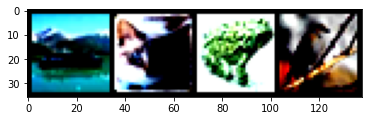

In [6]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.imshow(utils.make_grid(imgs).permute(1,2,0))

for i in range(size):
  print(classes[labels[i]])

In [0]:
class_names = ['car', 'cat']

label_map = {1: 0, 3: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [8]:
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [0]:
model = nn.Sequential (
    nn.Linear(3 * 32 * 32, 512),
     nn.Tanh(),
     nn.Linear(512,2)

)

In [0]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

In [0]:
x = torch.tensor([1.0, 2.0, 3.0])

In [15]:
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [0]:
model = nn.Sequential (
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

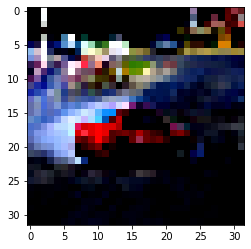

In [31]:
img, label = data_set[20]
plt.imshow(img.permute(1,2,0))
class_names[label]

In [18]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.5272, 0.4728]], grad_fn=<SoftmaxBackward>)

In [0]:
_, index = torch.max(out, dim=1)

In [25]:
print('->', class_names[label], ' model:', class_names[index])

-> car  model: car


# Implementing a completely connected classificator
---

In [0]:
model = nn.Sequential (
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1)
)
loss_function = nn.NLLLoss()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

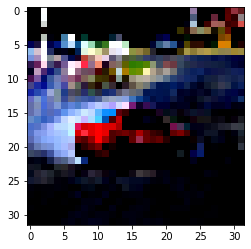

In [38]:
img, label = data_set[20]
plt.imshow(img.permute(1,2,0))
class_names[label]

In [39]:
out = model(img.view(-1).unsqueeze(0))
print(out)

print('->', class_names[label], ' model:', class_names[index])

tensor([[-0.6585, -0.7290]], grad_fn=<LogSoftmaxBackward>)
-> car  model: car


In [47]:
model = nn.Sequential (
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1)
)
loss_function = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

n_epochs = 5

for epoch in range(n_epochs):
  for img, label in data_set:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_function(out, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.000475
Epoch: 1, Loss: 0.001821
Epoch: 2, Loss: 0.023890
Epoch: 3, Loss: 0.001512
Epoch: 4, Loss: 1.723981


In [51]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential (
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1)
)
loss_function = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_function(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.478535
Epoch: 1, Loss: 0.384608
Epoch: 2, Loss: 0.380842
Epoch: 3, Loss: 0.506907
Epoch: 4, Loss: 0.331107
Epoch: 5, Loss: 0.283833
Epoch: 6, Loss: 0.226647
Epoch: 7, Loss: 0.224099
Epoch: 8, Loss: 0.319928
Epoch: 9, Loss: 0.349201
Epoch: 10, Loss: 0.090427
Epoch: 11, Loss: 0.162813
Epoch: 12, Loss: 0.233644
Epoch: 13, Loss: 0.199614
Epoch: 14, Loss: 0.151102
Epoch: 15, Loss: 0.297631
Epoch: 16, Loss: 0.171738
Epoch: 17, Loss: 0.211461
Epoch: 18, Loss: 0.699916
Epoch: 19, Loss: 0.084807
Epoch: 20, Loss: 0.137438
Epoch: 21, Loss: 0.161690
Epoch: 22, Loss: 0.073417
Epoch: 23, Loss: 0.234794
Epoch: 24, Loss: 0.078458
Epoch: 25, Loss: 0.157277
Epoch: 26, Loss: 0.027997
Epoch: 27, Loss: 0.033322
Epoch: 28, Loss: 0.068961
Epoch: 29, Loss: 0.199441
Epoch: 30, Loss: 0.035205
Epoch: 31, Loss: 0.088633
Epoch: 32, Loss: 0.049070
Epoch: 33, Loss: 0.039683
Epoch: 34, Loss: 0.163078
Epoch: 35, Loss: 0.055557
Epoch: 36, Loss: 0.093309
Epoch: 37, Loss: 0.113961
Epoch: 38, Loss: 0.079

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Accuracy: 0.863000
->:  car  model: car


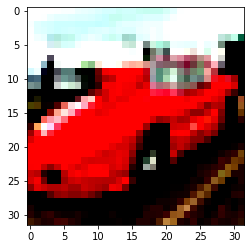

In [53]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f"% (correct / total))
img, label = validation_set[20]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()